<a href="https://colab.research.google.com/github/cbody2/nlp-on-yelp-reviews/blob/main/Yelp_Reviews_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Natural Language Processing (NLP)**

## Agenda

1. Reading in the Yelp reviews corpus
2. Term Frequency-Inverse Document Frequency (TF-IDF)
3. Using TF-IDF to summarize a Yelp review
4. Sentiment analysis using TextBlob

## **RECAP:**

## Part 1: Reading in the Yelp reviews corpus

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# read yelp.csv into a DataFrame
import pandas as pd
path='/content/drive/MyDrive/Predictive Analytics/yelp.csv'
yelp=pd.read_csv(path)


In [3]:
# examine the first row
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


In [49]:
# create a new DataFrame that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]
yelp_best_worst.shape

(4086, 12)

In [5]:
# define X and y
X = yelp_best_worst.text
y = yelp_best_worst.stars

In [7]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):

    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)

    # print the number of features that were generated
    print('Features: ', X_train_dtm.shape[1])

    # use Multinomial Naive Bayes to predict the star rating
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)

    # print the accuracy of its predictions
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

## Part 2: Term Frequency-Inverse Document Frequency (TF-IDF)

- **What:** Compute the "relative frequency" that a word appears in a document compared to its frequency across all documents in the corpus
- **Why:** More useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents)
- **Notes:** Useful for search engine relevance scoring, text summarization, document clustering, and classification

In [10]:
# example documents
#'call you tonight', 'Call me a cab', 'please call me... PLEASE!'
simple_train=['call you tonight', 'Call me a cab', 'please call me... PLEASE!']
simple_train

['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

### Calculating Term Frequency (TF):

In [11]:
# Term Frequency (count the number of occurrences of each term in each document)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(simple_train).toarray(),columns=vect.get_feature_names_out())
tf

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


### Calculating Document Frequency (DF):

In [12]:
# examine default parameters of CountVectorizer
?vect

[CountVectorizer documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

- **binary:** boolean, default=False
    - If True, all non-zero counts are set to 1. This is useful for discrete probabilistic models that model binary events rather than integer counts.

In [13]:
# use 'binary=True' parameter to check for occurrence (1) or non-occurrence (0)
vect = CountVectorizer(binary=True)
tf = pd.DataFrame(vect.fit_transform(simple_train).toarray(),columns=vect.get_feature_names_out())
tf

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,1,0,0


In [14]:
# Document Frequency (count the number of documents in which each term appears)
df = vect.fit_transform(simple_train).toarray().sum(axis=0) # axis = 0 is column; axis = 1 is row
pd.DataFrame(df.reshape(1,6), columns = vect.get_feature_names_out())

,cab,call,me,please,tonight,you
0,1,3,2,1,1,1


### Calculating TF-IDF from TF and DF:

In [15]:
# TF-IDF (simple version)
tf/df

,cab,call,me,please,tonight,you
0,0.0,0.333333,0.0,0.0,1.0,1.0
1,1.0,0.333333,0.5,0.0,0.0,0.0
2,0.0,0.333333,0.5,1.0,0.0,0.0


[TfidfVectorizer documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [16]:
# TfidfVectorizer (CountVectorizer + TfidfTransformer)
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
?vect

In [17]:
# TF-IDF (scikit-learn's default implementation)
pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns = vect.get_feature_names_out())

,cab,call,me,please,tonight,you
0,0.000000,0.385372,0.000000,0.000000,0.652491,0.652491
1,0.720333,0.425441,0.547832,0.000000,0.000000,0.000000
2,0.000000,0.266075,0.342620,0.901008,0.000000,0.000000


### Using TF-IDF for classification:

In [18]:
# use CountVectorizer with default parameters
vect = CountVectorizer()
tokenize_test(vect)

Features:  16825
Accuracy:  0.9187866927592955


In [19]:
# use TfidfVectorizer with default parameters
vect = TfidfVectorizer() #accuracy decreases even though we have the same features is because the importance level of the features are different; values get scaled up in Tf-idf.
tokenize_test(vect)

Features:  16825
Accuracy:  0.8199608610567515


In [20]:
# tune TfidfVectorizer for better results
# we are not tuning the model; we are tuning the method
#alter the default argument/parameters
vect = TfidfVectorizer(norm=None) #norm=None: values not normalized; accuracy increases from 81.99% to 90.8%
tokenize_test(vect)

Features:  16825
Accuracy:  0.9080234833659491


In [21]:
# make TfidfVectorizer behave like CountVectorizer; get same accuracy
vect = TfidfVectorizer(norm=None, use_idf=False) #essentially, it becomes Tf/1, which = CountVectorizer()
tokenize_test(vect)

Features:  16825
Accuracy:  0.9187866927592955


## Part 3: Using TF-IDF to summarize a Yelp review

Reddit's [autotldr](https://np.reddit.com/r/autotldr/comments/31b9fm/faq_autotldr_bot/) uses the [SMMRY](http://smmry.com/about) algorithm, which is based on TF-IDF!

In [53]:
# create a document-term matrix (minus stop words) using TfidfVectorizer
tfidf_vect = TfidfVectorizer(stop_words='english') #prevents Unicode error & reducing features
dtm = tfidf_vect.fit_transform(yelp['text'])
dtm.shape #10,000 documents, 28,880 features

(10000, 28880)

In [54]:
# create a list of all of the features
features = tfidf_vect.get_feature_names_out()
len(features) # num of columns (features)
features

array(['00', '000', '007', ..., 'école', 'ém', 'òc'], dtype=object)

In [58]:
import numpy as np

def summarize(yelp):

    # choose a random review that is at least 400 characters
    review_length = 0
    while review_length < 400:
        review_id = np.random.randint(0, yelp.shape[0])
        review_text = yelp.iloc[review_id]['text']
        review_length = len(review_text)

    # create a list of all unique words in the review (minus stop words) using CountVectorizer
    vect = CountVectorizer(stop_words='english')
    vect.fit([review_text])
    unique_words = vect.get_feature_names_out()

    feature_index_map = {word:i for i, word in enumerate(features)}

    # create a dictionary of words and their TF-IDF scores
    word_scores = {word: dtm[review_id, feature_index_map[word]] for word in unique_words}

    # print words with the top 5 TF-IDF scores
    print('TOP SCORING WORDS:')
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[0:5]
    for word, score in top_scores:
        print(word)

    # print 5 random words (for comparison)
    print('\n' + 'RANDOM WORDS:')
    random_words = np.random.choice(list(word_scores.keys()), size=5, replace=False)
    for word in random_words:
        print(word)

    # print the review
    print('\n' + review_text)

In [59]:
# summarize a random Yelp review
summarize(yelp)

TOP SCORING WORDS:
ravioli
ridgemont
spicoli
vans
perfect

RANDOM WORDS:
lobster
cheese
went
perfect
head

You know that scene in Fast Times at Ridgemont High where Jeff Spicoli takes one of his Vans off and hits himself on his head? Well that's what I did when I went to this place for the first time.   Why haven't I been coming here for the last 10 years, this place is great!!!  

I would say this is the best non-Pizzeria Bianco/Cibo pizza in the valley.  The crust is awesome, sauce and cheese just perfect!

The really impressive part is is how picture perfect the pizzas are made.

The lobster ravioli were huge, easily enough for two.  Baked Ravioli's were better that average but needed more basil or something.

You really can't dine here, so it's take out or delivery.  They have one table and a few other seats inside if you had to eat here I guess you could.


## Part 4: Sentiment analysis using TextBlob

[TextBlob](https://textblob.readthedocs.org): "Simplified Text Processing"

In [26]:
# print the first review
print(yelp_best_worst.loc[0,'text'])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [27]:
# save it as a TextBlob object
from textblob import TextBlob
review = TextBlob(yelp_best_worst.loc[0,'text'])


In [28]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [29]:
# examine the words
review.words

WordList(['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excellent', 'The', 'weather', 'was', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'grounds', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'was', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fills', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'was', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'was', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'looks', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'eggs', 

In [30]:
# examine the sentences
review.sentences

[Sentence("My wife took me here on my birthday for breakfast and it was excellent."),
 Sentence("The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure."),
 Sentence("Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning."),
 Sentence("It looked like the place fills up pretty quickly so the earlier you get here the better."),
 Sentence("Do yourself a favor and get their Bloody Mary."),
 Sentence("It was phenomenal and simply the best I've ever had."),
 Sentence("I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it."),
 Sentence("It was amazing."),
 Sentence("While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious."),
 Sentence("It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete."),
 Sentence("It was the best "toast" I've ever had."),


Sentiment is the "attitude" of the speaker:

- **polarity** ranges from -1 (most negative) to 1 (most positive)
- **subjectivity** ranges from 0 (very objective) to 1 (very subjective)

In [31]:
# examine the review sentiment
print(review.sentiment.polarity)
print(review.sentiment.subjectivity)

0.40246913580246907
0.6591122868900646


In [32]:
# quick aside: understanding the apply method
yelp['length'] = yelp.text.apply(len)
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345


In [33]:
# define a function that accepts text and returns the polarity
def detect_sentiment(text):
    # Call textblob function
    blob = TextBlob(text)
    # return the polarity
    return blob.sentiment.polarity

In [34]:
# create a new DataFrame column for sentiment (WARNING: SLOW!)
yelp['sentiment'] = yelp.text.apply(detect_sentiment)
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,sentiment
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889,0.402469
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345,0.229773


<Axes: title={'center': 'sentiment'}, xlabel='stars'>

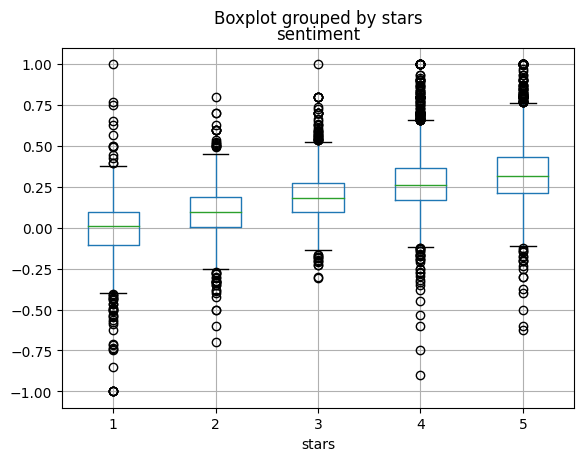

In [36]:
# box plot of sentiment grouped by stars
yelp.boxplot('sentiment', by='stars')

In [37]:
# reviews with most positive sentiment
yelp.loc[yelp.sentiment==1,'text'].head()

254    Our server Gary was awesome. Food was amazing....
347    3 syllables for this place. \nA-MAZ-ING!\n\nTh...
420                                    LOVE the food!!!!
459    Love it!!! Wish we still lived in Arizona as C...
679                                     Excellent burger
Name: text, dtype: object

In [38]:
# reviews with most negative sentiment
yelp.loc[yelp.sentiment==-1,'text'].head()

773     This was absolutely horrible. I got the suprem...
1517                  Nasty workers and over priced trash
3266    Absolutely awful... these guys have NO idea wh...
4766                                       Very bad food!
5812        I wouldn't send my worst enemy to this place.
Name: text, dtype: object

In [39]:
# widen the column display
pd.set_option('display.max_colwidth',500)

In [40]:
# negative sentiment in a 5-star review
yelp.loc[(yelp.stars == 5) & (yelp.sentiment<-0.2),'text'].head(1)

390    RIP AZ Coffee Connection.  :(  I stopped by two days ago unaware that they had closed.  I am severely bummed.  This place is irreplaceable!  Damn you, Starbucks and McDonalds!
Name: text, dtype: object

In [41]:
# positive sentiment in a 1-star review
yelp.loc[(yelp.stars == 1) & (yelp.sentiment>0.5),'text'].head(1)

1781    If you like the stuck up Scottsdale vibe this is a good place for you. The food isn't impressive. Nice outdoor seating.
Name: text, dtype: object

In [42]:
# reset the column display width
pd.reset_option('display.max_colwidth')